# NTFA Experiment 

We aggregated the week 2 data of the OpenStack dataset from Coburg Intrusion Detection Data Sets CIDDS-001 over a 3600-second time frame. This dataset contained 10,310,735 flow data records over one week.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("output_w2_3600S.csv")

In [21]:
df.head()

,start_frame,end_frame,src_ip,duration,protocol,src_port,dst_ip,dst_port,number_packets,label
0,2017-03-22T00:00:00.071000,2017-03-22T01:00:00.071000,192.168.220.14,0.178,2,4,3,4,138,---_normal
1,2017-03-22T00:00:00.071000,2017-03-22T01:00:00.071000,192.168.220.10,0.161,2,4,3,4,126,---_normal
2,2017-03-22T00:00:00.071000,2017-03-22T01:00:00.071000,192.168.100.5,14.853,2,3,17,18,931,---_normal
3,2017-03-22T00:00:00.071000,2017-03-22T01:00:00.071000,10022_204,2.743,1,1,1,1,185,---_normal
4,2017-03-22T00:00:00.071000,2017-03-22T01:00:00.071000,192.168.210.5,54.814,3,399,20,8,1381,---_normal


In [22]:
df["label"].replace("---_normal","normal",inplace=True)

In [23]:
df["label"].unique()

array(['normal', 'portScan_victim', 'dos_victim', 'portScan_attacker',
       'pingScan_victim', 'bruteForce_victim', 'dos_attacker',
       'bruteForce_attacker'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98148 entries, 0 to 98147
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   start_frame     98148 non-null  object 
 1   end_frame       98148 non-null  object 
 2   src_ip          98148 non-null  object 
 3   duration        98148 non-null  float64
 4   protocol        98148 non-null  int64  
 5   src_port        98148 non-null  int64  
 6   dst_ip          98148 non-null  int64  
 7   dst_port        98148 non-null  int64  
 8   number_packets  98148 non-null  int64  
 9   label           98148 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 7.5+ MB


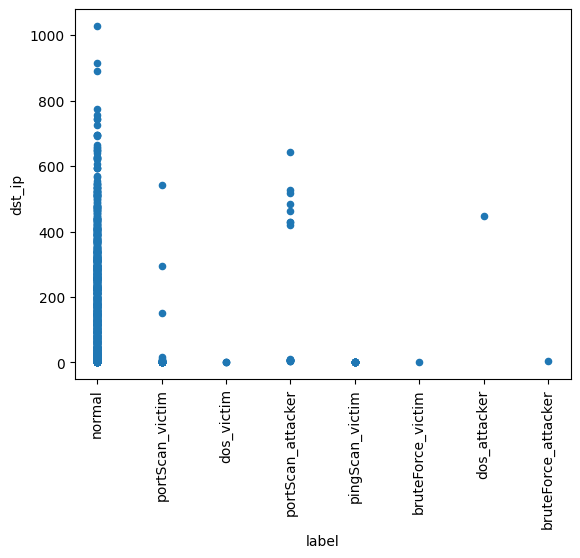

In [25]:
fig1 = df.plot(kind="scatter", x="label", y="dst_ip", rot=90).get_figure()
fig1.savefig('label_dst_ip.png')


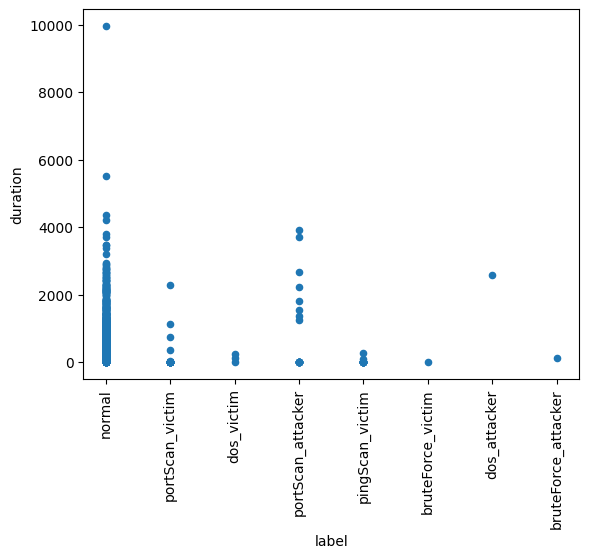

In [26]:
fig1 = df.plot(kind="scatter", x="label", y="duration", rot=90).get_figure()
fig1.savefig('label_duration.png')


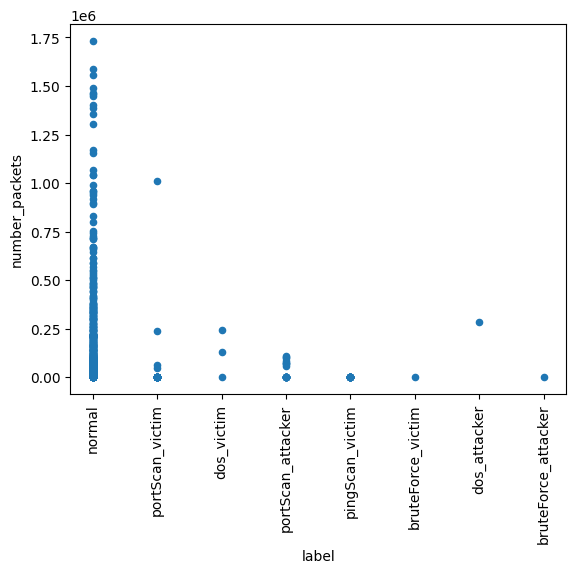

In [27]:
fig1 = df.plot(kind="scatter", x="label", y="number_packets", rot=90).get_figure()
fig1.savefig('label_number_packets.png')

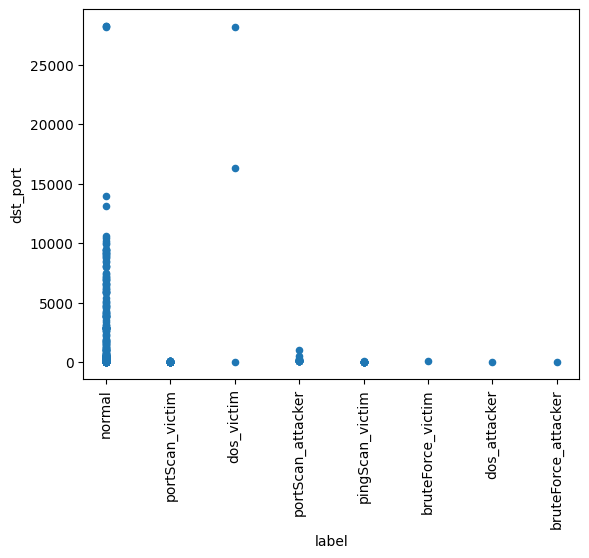

In [28]:
fig1 = df.plot(kind="scatter", x="label", y="dst_port", rot=90).get_figure()
fig1.savefig('label_dst_port.png')

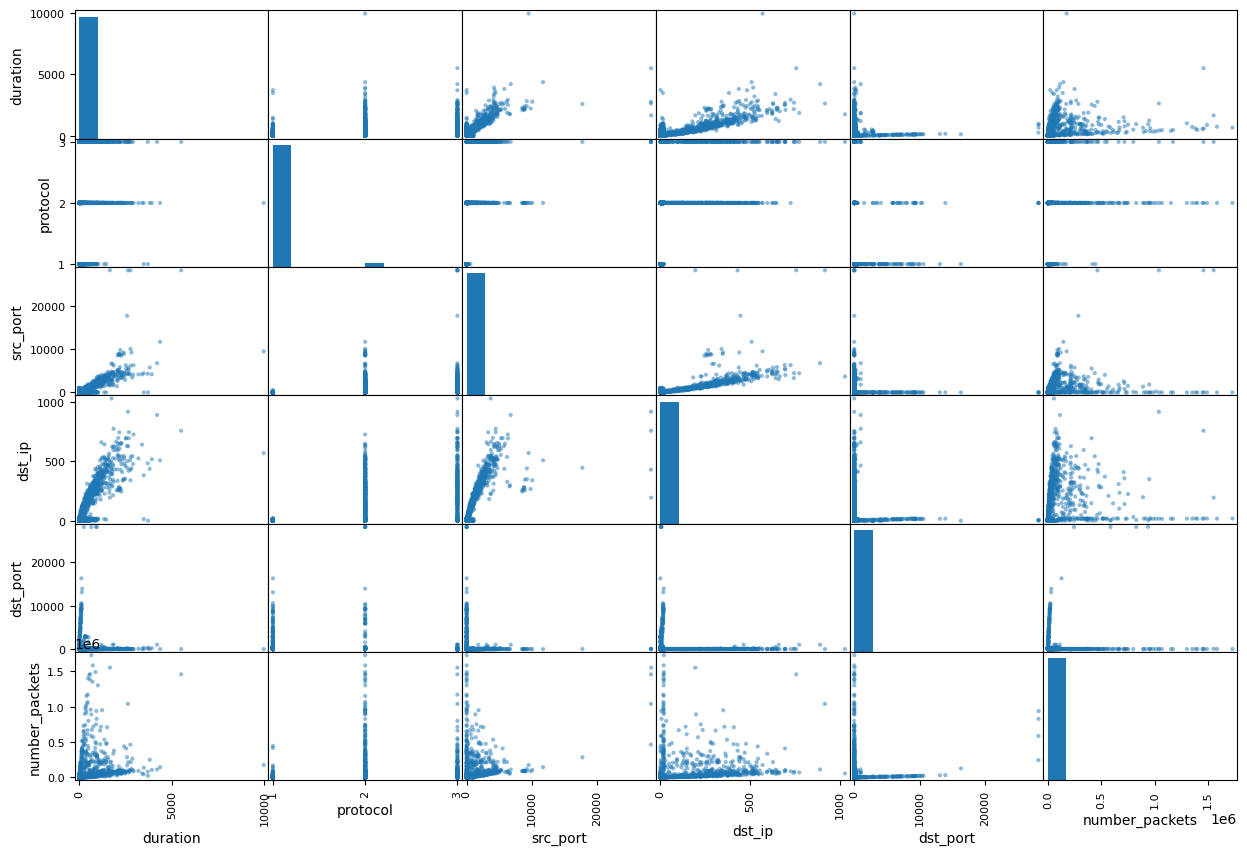

In [29]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = [ "duration", "protocol", "src_port","dst_ip","dst_port","number_packets","label"]
my_scatter = scatter_matrix(df[attributes], figsize=(15, 10))
plt.savefig(r"scatter_matrix.png")

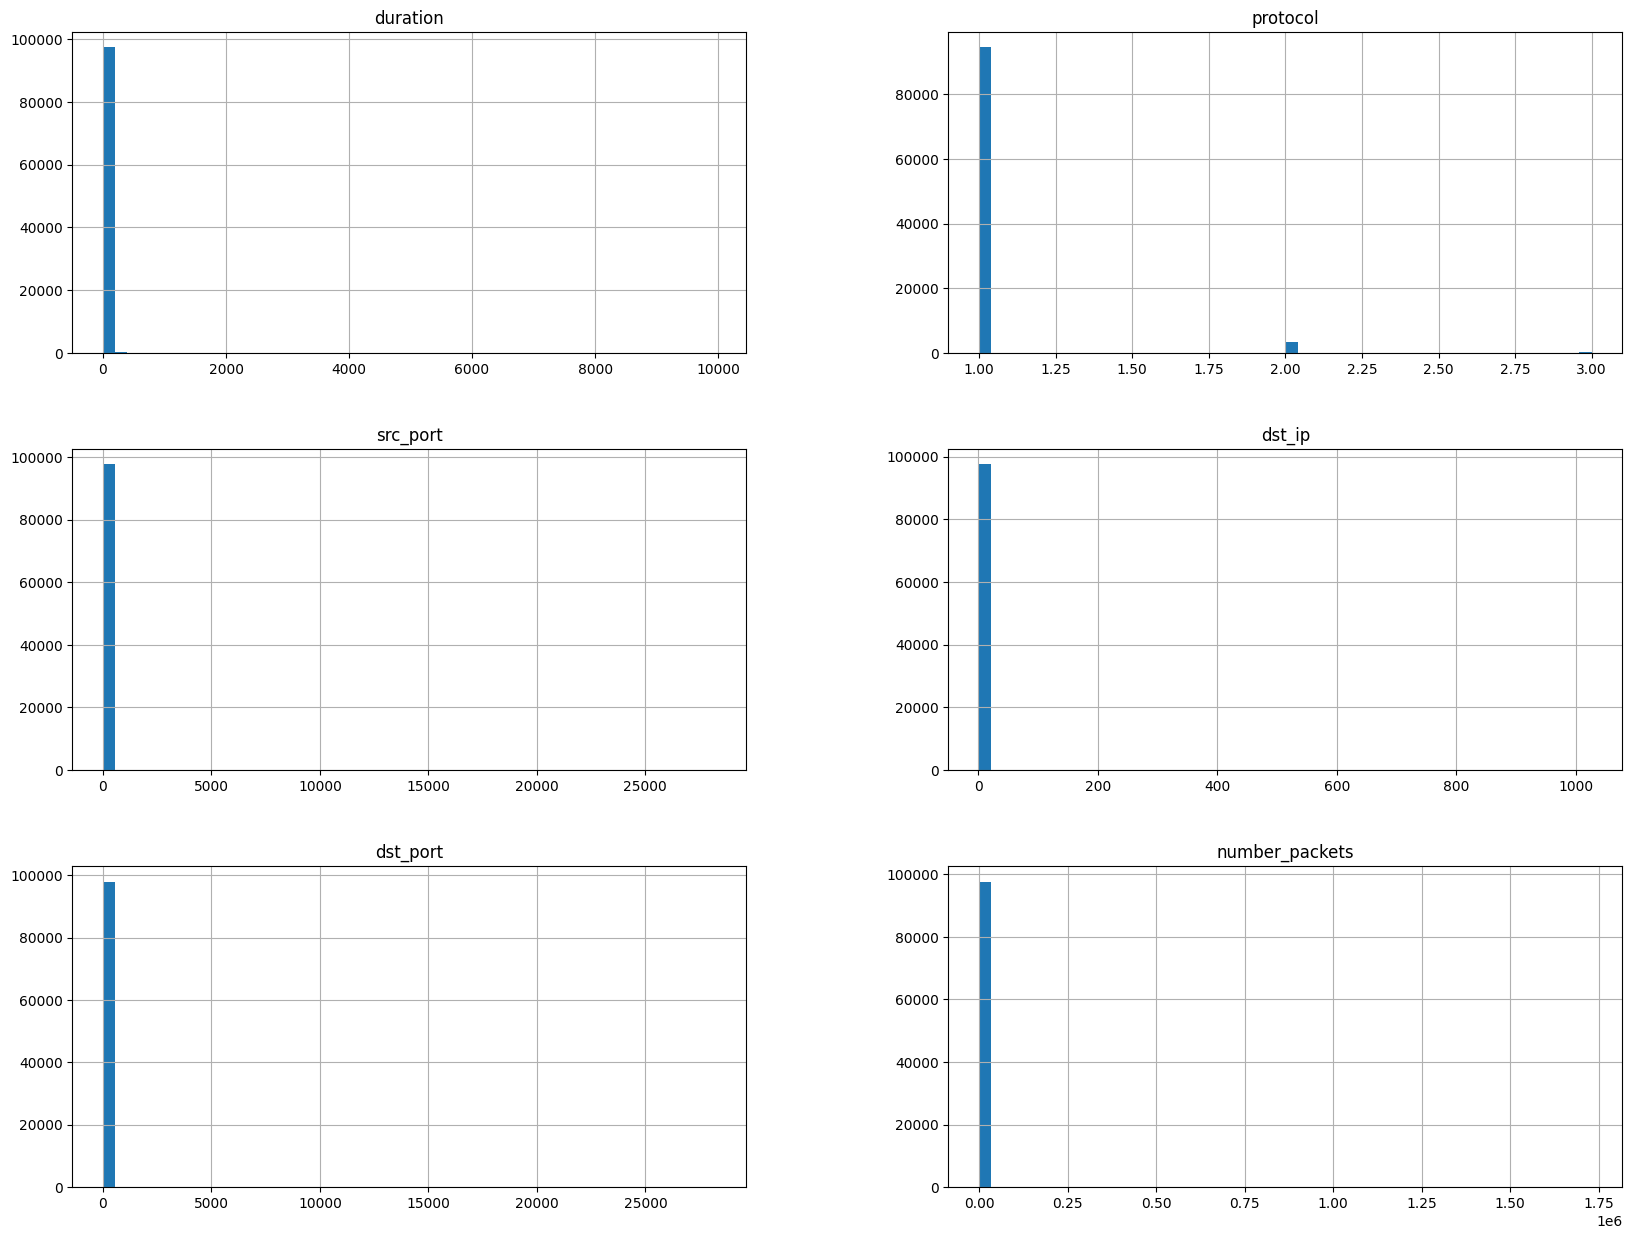

In [30]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("hist.png")
plt.show()

## Cross validation

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_text = df.pop("label")
Y = le.fit_transform(Y_text)


In [32]:
print(Y)

[4 4 4 ... 4 4 4]


In [33]:
df.pop("start_frame")
df.pop("end_frame")
df.pop("src_ip")

0        192.168.220.14
1        192.168.220.10
2         192.168.100.5
3             10022_204
4         192.168.210.5
              ...      
98143          10048_60
98144          10016_50
98145         11744_137
98146     192.168.100.2
98147         15799_153
Name: src_ip, Length: 98148, dtype: object

In [34]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier()
r = cross_val_score(clf, df, Y, cv=10)

print(r.mean())

C:\Users\k1kar\anaconda3\envs\General\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.9988588655772717


In [35]:
clf.fit(df, Y)
plt.figure(figsize=(100,100)) 
tree.plot_tree(clf,fontsize=9)
plt.savefig('tree.png')